In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import networkx as nx
import copy

In [37]:
def copy_data(data, idx):
    data_new = {}
    for key in data:
        data_new[key] = copy.deepcopy([data[key][i] for i in idx])
        if key in ['graph_labels', 'N_edges']:
            data_new[key] = np.array(data_new[key]).astype(np.int32)
        #print(key, len(data_new[key]))

    return data_new

def plot_hist(data):
    shapes = np.array([A.shape[0] for A in data['Adj_matrices']])
    plt.figure(figsize=(18, 5))
    plt.subplot(131)
    label_bins = len(np.unique(data['graph_labels']))
    plt.hist(data['graph_labels'], bins=label_bins)
    plt.xlabel(r'Graph label (number of green nodes), $N_{green}$', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.subplot(132)
    plt.hist(shapes, bins=len(np.unique(shapes)))
    plt.xlabel(r'Graph size (number of nodes), $N$', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.subplot(133)
    plt.hist2d(data['graph_labels'], shapes, bins=[label_bins, 20])
    plt.xlabel(r'Graph label (number of green nodes), $N_{green}$', fontsize=12)
    plt.ylabel(r'Graph size (number of nodes), $N$', fontsize=12)
    plt.colorbar()
    plt.show()
    print('Correlation between the graph size and labels: %.2f' % 
          np.corrcoef(data['graph_labels'], shapes)[0,1])

edgecolors = [0.3, 0.3, 0.3, 0.1]
edgewidth = 0.5
def draw_graph_colors(data, ind, alpha=None):
    G = nx.from_numpy_array(data['Adj_matrices'][ind])
    fig = plt.figure()
    if alpha is None:
        nx.draw_networkx(G, node_color=data['node_features'][ind], 
                         with_labels=False, width=edgewidth, edgecolors=edgecolors)
    else:
        pos = nx.spring_layout(G)
        nx.draw_networkx_edges(G, pos, width=edgewidth)
        nx.draw_networkx_nodes(G, pos, node_color=node_features, alpha=alpha,
                               edgecolors=edgecolors)
    plt.axis('off')    
    plt.show()
    print('N_nodes %d' % data['Adj_matrices'][ind].shape[0])
    for key in data:
        if isinstance(data[key][ind], np.ndarray):
            #print(key, '\n', train_data[key][ind].astype(np.int32))
            pass
        else:
            print(key, data[key][ind])
            
def draw_graph_triangles(data, ind, cm='Purples'):
    G = nx.from_numpy_array(data['Adj_matrices'][ind])    
    gt_attn = data['GT_attn'][ind].squeeze()
    gt_attn = gt_attn / (float(np.sum(gt_attn)) + 1e-7)
    fig = plt.figure()
    cmap = plt.cm.get_cmap(cm, len(gt_attn))
    vmin = gt_attn.min()
    vmax = gt_attn.max()
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, node_color=gt_attn, with_labels=False,
                    width=edgewidth, edgecolors=edgecolors, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
    sm._A = []
    ticks = np.linspace(0, gt_attn.max(), 5)
    cbar = plt.colorbar(sm, ticks=ticks, format='%.2f', fraction=0.02, pad=0.04) 
    cbar.ax.tick_params(labelsize=14)
    plt.axis('off')    
    plt.show()
    print('N_nodes %d' % train_data['Adj_matrices'][ind].shape[0])
    for key in data:
        if isinstance(data[key][ind], np.ndarray):
            #print(key, '\n', train_data[key][ind].astype(np.int32))
            pass
        else:
            print(key, data[key][ind])

# COLORS

In [13]:
# Train data
with open('data/random_graphs_colors_dim3_train.pkl', 'rb') as f:
    train_data = pickle.load(f)
for key in train_data:
    print('train', key, len(train_data[key]))

# Test data
with open('data/random_graphs_colors_dim3_test.pkl', 'rb') as f:
    test_data = pickle.load(f)
for key in test_data:
    print('test', key, len(test_data[key]))

train Adj_matrices 500
train GT_attn 500
train graph_labels 500
train node_features 500
train N_edges 500
test Adj_matrices 7500
test GT_attn 7500
test graph_labels 7500
test node_features 7500
test N_edges 7500


## COLORS-Train

COLORS-Train: 500 graphs, N_nodes_min=4, N_nodes_max=25


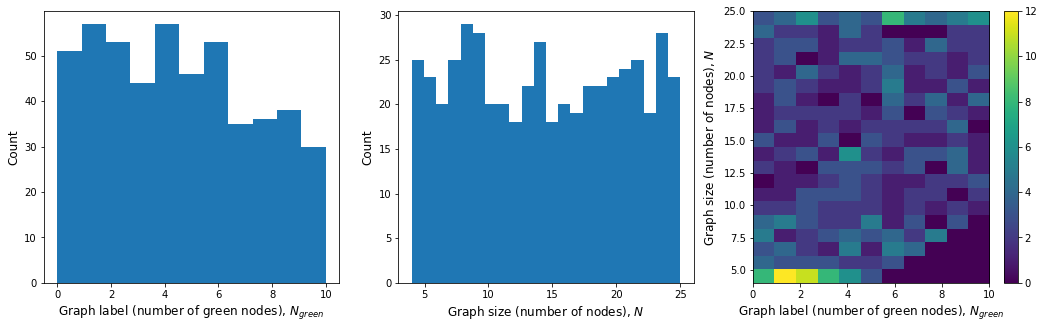

Correlation between the graph size and labels: 0.25

Example of a training graph


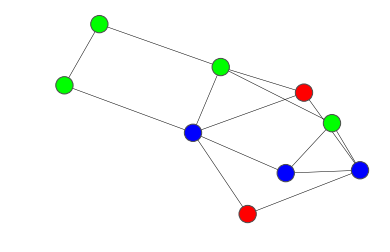

N_nodes 9
graph_labels 4
N_edges 14


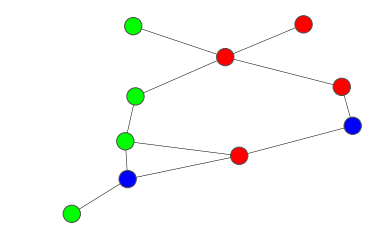

N_nodes 10
graph_labels 4
N_edges 11


In [7]:
shapes = np.array([A.shape[0] for A in train_data['Adj_matrices']])
print('COLORS-Train: {} graphs, N_nodes_min={}, N_nodes_max={}'.format(len(shapes), shapes.min(), shapes.max()))
plot_hist(train_data)
print('\nExample of a training graph')
idx = np.where((shapes > 8) & (shapes < 11) & (train_data['graph_labels'] == 4))[0]
for i, ind in enumerate(idx[:2]):
    draw_graph_colors(train_data, ind)

## COLORS-Test-Orig

COLORS-Test-Orig: 2500 graphs, N_nodes_min=4, N_nodes_max=25


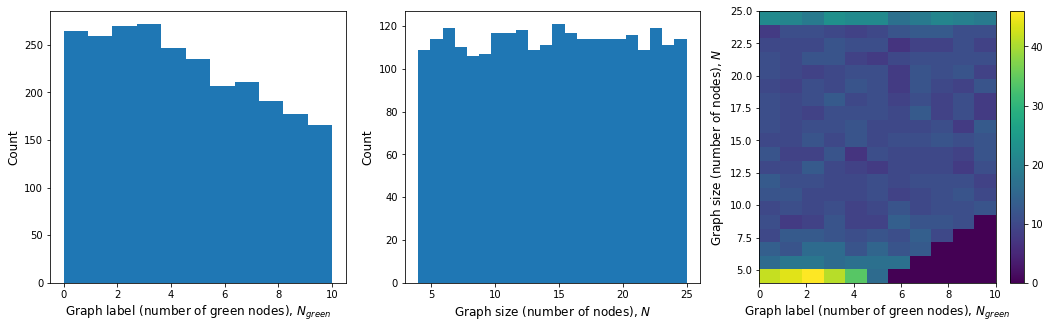

Correlation between the graph size and labels: 0.22

Example of a test-orig graph


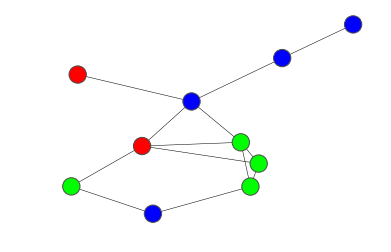

N_nodes 10
graph_labels 4
N_edges 13


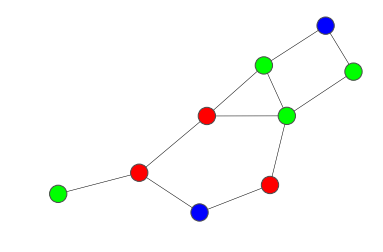

N_nodes 9
graph_labels 4
N_edges 11


In [10]:
test_data_orig = copy_data(test_data, np.arange(2500))
shapes = np.array([A.shape[0] for A in test_data_orig['Adj_matrices']])
print('COLORS-Test-Orig: {} graphs, N_nodes_min={}, N_nodes_max={}'.format(len(shapes), 
                                                                           shapes.min(), shapes.max()))
plot_hist(test_data_orig)
print('\nExample of a test-orig graph')
idx = np.where((shapes > 8) & (shapes < 11) & (test_data_orig['graph_labels'] == 4))[0]
for i, ind in enumerate(idx[:2]):
    draw_graph_colors(test_data_orig, ind)

## COLORS-Test-Large

COLORS-Test-Large: 2500 graphs, N_nodes_min=26, N_nodes_max=200


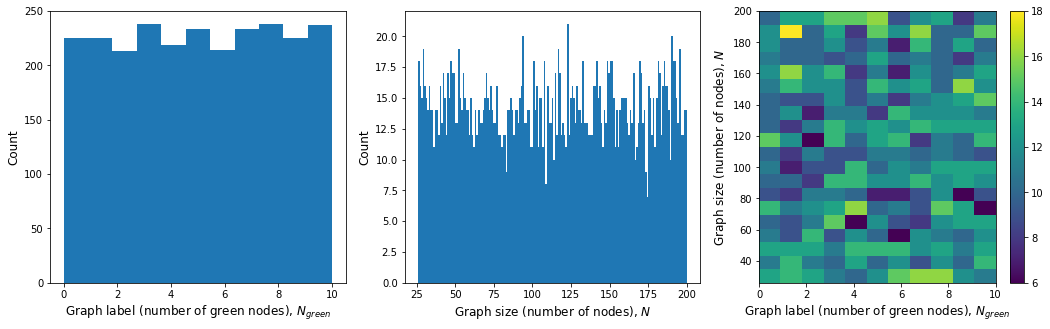

Correlation between the graph size and labels: -0.00

Example of a test-large graph


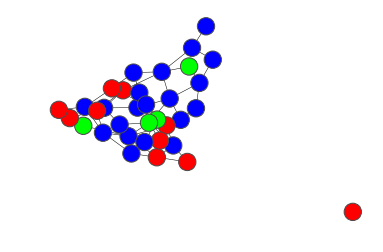

N_nodes 34
graph_labels 4
N_edges 56


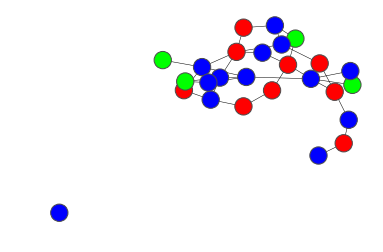

N_nodes 26
graph_labels 4
N_edges 34


In [19]:
test_data_large = copy_data(test_data, np.arange(2500, 5000))
shapes = np.array([A.shape[0] for A in test_data_large['Adj_matrices']])
print('COLORS-Test-Large: {} graphs, N_nodes_min={}, N_nodes_max={}'.format(len(shapes), 
                                                                            shapes.min(), shapes.max()))
plot_hist(test_data_large)
print('\nExample of a test-large graph')
idx = np.where((shapes < 35) & (test_data_large['graph_labels'] == 4))[0]
for i, ind in enumerate(idx[:2]):
    draw_graph_colors(test_data_large, ind)

## COLORS-Test-LargeC

COLORS-Test-LargeC: 2500 graphs, N_nodes_min=26, N_nodes_max=200


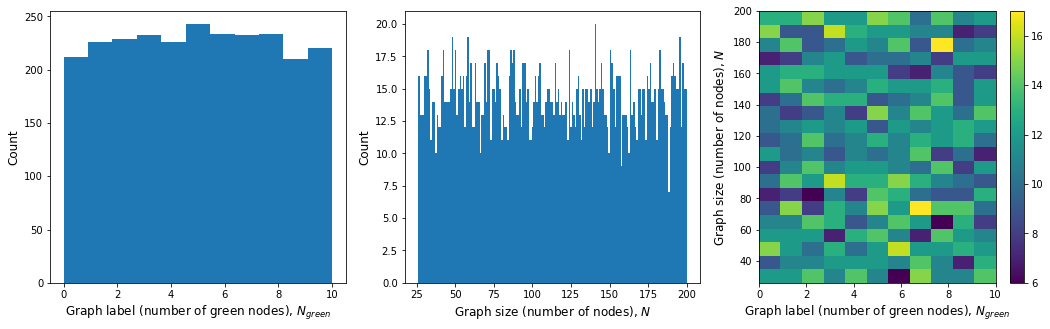

Correlation between the graph size and labels: -0.01

Example of a test-large-c graph


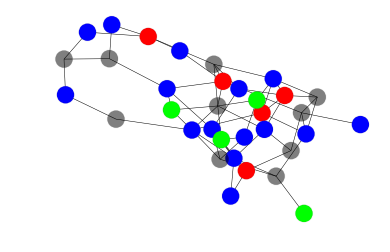

N_nodes 34
graph_labels 4
N_edges 61


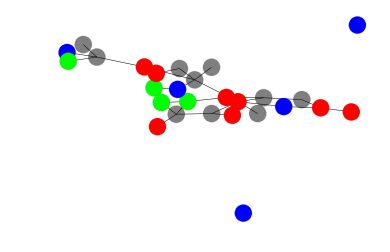

N_nodes 27
graph_labels 4
N_edges 32


In [18]:
test_data_large_c = copy_data(test_data, np.arange(5000, len(test_data['Adj_matrices'])))
shapes = np.array([A.shape[0] for A in test_data_large_c['Adj_matrices']])
print('COLORS-Test-LargeC: {} graphs, N_nodes_min={}, N_nodes_max={}'.format(len(shapes), 
                                                                             shapes.min(), shapes.max()))
plot_hist(test_data_large_c)
print('\nExample of a test-large-c graph')
idx = np.where((shapes < 35) & (test_data_large_c['graph_labels'] == 4))[0]
for i, ind in enumerate(idx[:2]):
    node_features = test_data_large_c['node_features'][ind].astype(np.float32)
    alpha = node_features.copy()[:, 3]
    alpha[alpha == 1] = 0.5
    alpha[alpha == 0] = 1    
    draw_graph_colors(test_data_large_c, ind, alpha)

# TRIANGLES

In [20]:
# Train data
with open('data/random_graphs_triangles_train.pkl', 'rb') as f:
    train_data = pickle.load(f)
for key in train_data:
    print('train', key, len(train_data[key]))

# Test data
with open('data/random_graphs_triangles_test.pkl', 'rb') as f:
    test_data = pickle.load(f)
for key in test_data:
    print('test', key, len(test_data[key]))

train Adj_matrices 30000
train GT_attn 30000
train graph_labels 30000
train N_edges 30000
test Adj_matrices 10000
test GT_attn 10000
test graph_labels 10000
test N_edges 10000


## TRIANGLES-Train

TRIANGLES-Train: 30000 graphs, N_nodes_min=4, N_nodes_max=25


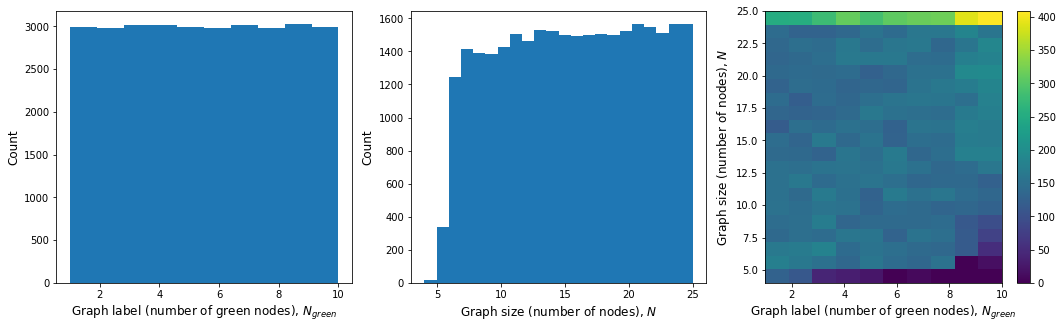

Correlation between the graph size and labels: 0.12

Example of a training graph


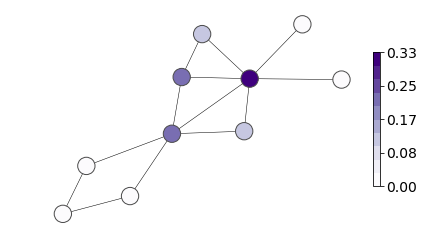

N_nodes 10
graph_labels 3
N_edges 13


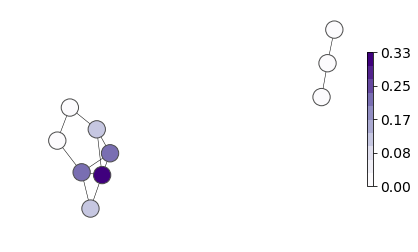

N_nodes 10
graph_labels 3
N_edges 12


In [36]:
shapes = np.array([A.shape[0] for A in train_data['Adj_matrices']])
print('TRIANGLES-Train: {} graphs, N_nodes_min={}, N_nodes_max={}'.format(len(shapes), 
                                                                          shapes.min(), shapes.max()))
plot_hist(train_data)
print('\nExample of a training graph')
idx = np.where((shapes > 8) & (shapes < 11) & (train_data['graph_labels'] == 3))[0]
for i, ind in enumerate(idx[:2]):        
    draw_graph_triangles(train_data, ind, 'Purples')  

## TRIANGLES-Test-Orig 

TRIANGLES-Test-Orig: 5000 graphs, N_nodes_min=4, N_nodes_max=25


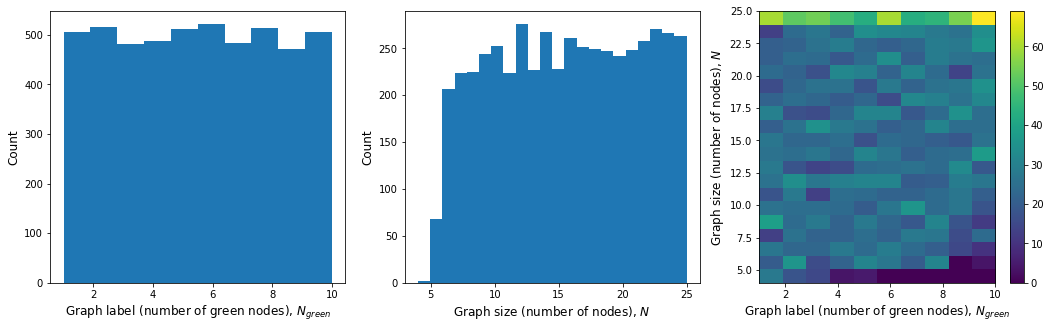

Correlation between the graph size and labels: 0.10

Example of a test-orig graph


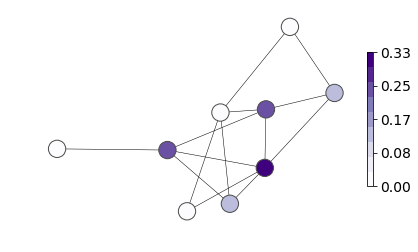

N_nodes 21
graph_labels 3
N_edges 14


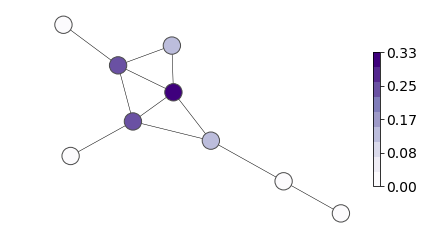

N_nodes 22
graph_labels 3
N_edges 11


In [38]:
test_data_orig = copy_data(test_data, np.arange(5000))
shapes = np.array([A.shape[0] for A in test_data_orig['Adj_matrices']])
print('TRIANGLES-Test-Orig: {} graphs, N_nodes_min={}, N_nodes_max={}'.format(len(shapes), 
                                                                              shapes.min(), shapes.max()))
plot_hist(test_data_orig)
print('\nExample of a test-orig graph')
idx = np.where((shapes > 8) & (shapes < 11) & (test_data_orig['graph_labels'] == 3))[0]
for i, ind in enumerate(idx[:2]):        
    draw_graph_triangles(test_data_orig, ind, 'Purples')  

## TRIANGLES-Test-Large 

TRIANGLES-Test-Large: 5000 graphs, N_nodes_min=26, N_nodes_max=100


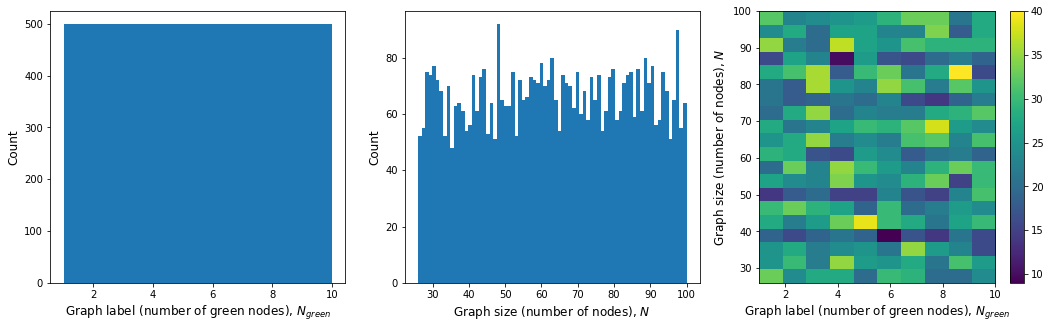

Correlation between the graph size and labels: 0.02

Example of a test-large graph


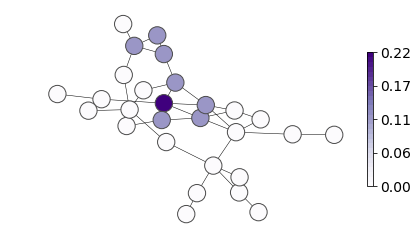

N_nodes 14
graph_labels 3
N_edges 37


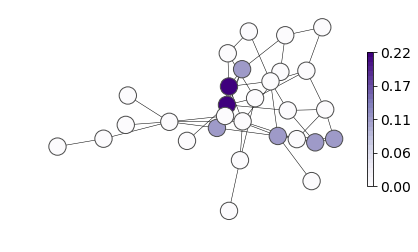

N_nodes 9
graph_labels 3
N_edges 47


In [45]:
test_data_large = copy_data(test_data, np.arange(5000, len(test_data['Adj_matrices'])))
shapes = np.array([A.shape[0] for A in test_data_large['Adj_matrices']])
print('TRIANGLES-Test-Large: {} graphs, N_nodes_min={}, N_nodes_max={}'.format(len(shapes), 
                                                                              shapes.min(), shapes.max()))
plot_hist(test_data_large)
print('\nExample of a test-large graph')
unique_gt_values = np.array([len(np.unique(gt_attn)) for gt_attn in test_data_large['GT_attn']])
D = np.array([np.sum(A.sum(1) == 0) for A in test_data_large['Adj_matrices']])
idx = np.where((unique_gt_values > 2) & (D == 0) & (shapes < 35) & (test_data_large['graph_labels'] == 3))[0]
for i, ind in enumerate(idx[:2]):    
    draw_graph_triangles(test_data_large, ind, 'Purples')  